<a href="https://colab.research.google.com/github/MounishaChalasani/MounishaChalasani-INFO5731_Assignment_One_fall2022/blob/main/INFO5731_Assignment_Three_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [1]:
# Write your code here

import os
import tweepy as tw
import pandas as pd
import re
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import stopwords
import requests
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [2]:
words = set(nltk.corpus.words.words())

def get_lemmatized(i):
  word_stemmer = WordNetLemmatizer()
  english_stopwords = stopwords.words("english")
  final_words = []
  for x in range(0, len(i)):
      doc = re.sub(r'\W', ' ', str(i[x]))
      doc = re.sub(r'\s+[a-zA-Z]\s+', ' ', doc)
      doc = re.sub(r'\s+', ' ', doc, flags=re.I)
      doc = re.sub(r'^b\s+', '', doc)
      doc = re.sub(r'\d+','',doc)
      doc = doc.lower()
      doc = doc.split()
      doc = [word_stemmer.lemmatize(word) for word in doc]
      doc = [word for word in doc if word not in english_stopwords]
      doc = ' '.join(doc)
      doc = " ".join(word for word in nltk.wordpunct_tokenize(doc) if word.lower() in words or not word.isalpha())
      final_words.append(doc)
  return final_words

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reviews.csv')
final_words  = get_lemmatized(data["Review"])
print(final_words)

['movie affect way make physically painful experience good way', 'everyone saying film year review flooding wa quite excited movie cinema felt hollow empty continue writing let say film year real masterpiece cinematography excellent acting incredible side character bland overly dramatic plot heavily plot twist film harsh actually fall flat face good point though phoenix phenomenal score great cinematography also incredible plot great even ha plot hole scene left empty film year nope', 'truly masterpiece best film one best film decade truly best film bring comic book chillingly realistically real ife remarkable direction cinematography music acting people find disturbing violent necessity message society unrecognized people proving something way show class difference corruption rich talented rule around exaggerated make different believable could multiple joker living society could shake around much bitter way film show making people uncomforting people consider wake call message first 

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [7]:
# Write your code here

from sklearn.feature_extraction.text import TfidfVectorizer
words = []
for i in data['Review']:
  words.append(i)
tf_idf_vectorizer = TfidfVectorizer()
matrix = tf_idf_vectorizer.fit_transform(words)
names = tf_idf_vectorizer.get_feature_names()p
idx=[n for n in range(1, len(words)+1)]
tf_idf_vectorizer = TfidfVectorizer(input=words, min_df=0.1, stop_words='english')
TF_IDF=pd.DataFrame(matrix.T.todense(), index=names, columns=idx)
TF_IDF

SyntaxError: ignored

In [ ]:
from nltk import corpus
import pandas
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [ ]:
words = []
for i in data['Review']:
  words.append(i)

words.append(cleaned_query[0])
tf_idf_vectorizer = TfidfVectorizer(input=words, min_df=0.1, stop_words='english')
vector_matrix = tf_idf_vectorizer.fit_transform(words)

dict = {}
for i in range(0, vector_matrix.shape[0]):
  sin=cosine_similarity(vector_matrix[80], vector_matrix[i])
  dict[str(i)] = sin[0][0]
  i+=1

keys = (sorted(dict, key=dict.get,reverse=True))
cos_dict = {}
for i in keys:
  cos_dict[i] = dict[i]

In [ ]:
Review = []
cosine = []
for y in cos_dict:
  words.append([int(y)])
  cosine.append(cos_dict[y])
df = pd.DataFrame(Review)

df['Rank'] = [i for i in range(1, len(keys)+1)]
df['Cosine_Similarity'] = cosine
df.head(5)

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [8]:
# Write your code here

!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import gensim
from gensim import models
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

doc = [word.split() for word in final_words if str(word) != 'nan' and str(word) != '']
embedding_model = models.Word2Vec(doc,vector_size=300)
words_list = list(embedding_model.wv.index_to_key)
print(words_list)

['movie', 'joker', 'film', 'wa', 'phoenix', 'character', 'one', 'like', 'performance', 'ha', 'story', 'time', 'good', 'make', 'see', 'people', 'really', 'best', 'dark', 'great', 'feel', 'comic', 'well', 'get', 'way', 'acting', 'watch', 'even', 'would', 'much', 'society', 'also', 'batman', 'fleck', 'think', 'book', 'say', 'life', 'man', 'take', 'many', 'go', 'thing', 'could', 'world', 'made', 'seen', 'scene', 'actor', 'mental', 'doe', 'year', 'masterpiece', 'never', 'know', 'cinematography', 'every', 'show', 'ever', 'real', 'ledger', 'villain', 'role', 'amazing', 'give', 'u', 'driver', 'point', 'better', 'origin', 'work', 'comedy', 'taxi', 'score', 'first', 'clown', 'watching', 'need', 'end', 'violence', 'something', 'bad', 'come', 'still', 'lot', 'heath', 'without', 'going', 'city', 'illness', 'look', 'action', 'different', 'everything', 'want', 'plot', 'moment', 'part', 'fan', 'thought', 'nothing', 'study', 'de', 'mind', 'review', 'perfect', 'though', 'everyone', 'love', 'felt', 'dire

In [13]:
embedding_model.wv.save_word2vec_format('model.bin')
embedding_model.save('model.bin')
print(embedding_model)

Word2Vec<vocab=1710, vector_size=300, alpha=0.025>


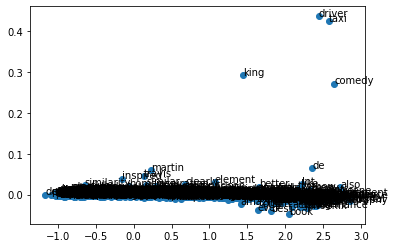

In [14]:
X = embedding_model.wv[embedding_model.wv.index_to_key]
PCA = PCA(n_components=2)
plot = PCA.fit_transform(X)
pyplot.scatter(plot[:, 0], plot[:, 1])
word_list = list(embedding_model.wv.index_to_key)
for i, words in enumerate(word_list):
	pyplot.annotate(words, xy=(plot[i, 0], plot[i, 1]))
pyplot.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file
# Link: 
https://github.com/MounishaChalasani/MounishaChalasani-INFO5731_Assignment_One_fall2022/blob/main/reviews.csv